In [384]:
#display all columns
pd.set_option('display.max_columns', None)

In [1]:
import os
import pandas as pd
import glob

In [16]:
# load in the Code Book excel sheet that includes the feature names for the UCLA Lung Cancer Dataset 
# and their meaning

code_book = pd.read_excel(f'/datasets/Code_book.xlsx')
code_book

,Variable name,Comment
0,hist,Histological type of lung cancer
1,hist_category,Categorical - Histological type of lung cancer
2,stage,TMN staging of lung cancer
3,stage_category,Categorical - TMN staging of lung cancer
4,post_screen_lc_x,Post lung cancer screening lung cancer
5,intervel_ct_hist,Time interval in days between CT exam date and...
6,lungrads,Baseline low-dose CT Lung-RADS score
7,sex,Patient sex
8,race_ethnicity_new,Patient race/ethnicity
9,age_new,Patient age at baseline low-dose CT screening


In [37]:
Comment = code_book.loc[code_book['Variable name'] == 'department_new', 'Comment']
for x in Comment:
    print(x)

Department of referring physician for the baseline low-dose CT screening


In [399]:
# load in the Code Book excel sheet that includes the feature names for the UCLA Lung Cancer Dataset 
# and their meaning

code_book2 = pd.read_excel(f'/datasets/Code_book_UCLA_v20240719.xlsx')
code_book2

,Variable name,Comment
0,hist,Histological type of lung cancer
1,hist_category,Categorical - Histological type of lung cancer
2,stage,TMN staging of lung cancer
3,stage_category,Categorical - TMN staging of lung cancer
4,intervel_ct_hist,Time interval in days between CT exam date and...
5,lungrads,Baseline low-dose CT Lung-RADS score
6,age,Patient age at baseline low-dose CT screening
7,sex,Patient sex
8,bmi,Patient body mass index at baseline screen
9,cancer_hx,Personal history of cancer


In [998]:
# Load in the Lung Cancer Dataset
complete_df = pd.read_excel(r'/workspace/home/Sybil_Feature_Vector_Results.xlsx')

In [326]:
#Load in the updated Lung Cancer Dataset

detailed_df = pd.read_excel(r'/datasets/Data_2016_merged_v20240719.xlsx')

In [593]:
detailed_df['race_ethnicity_new'].value_counts()

race_ethnicity_new
White                               4002
Asian                                483
Black                                374
Hispanic                             313
Other                                 49
American Indian or Alaska Native       8
Name: count, dtype: int64

In [327]:
detailed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MRN_h                           5436 non-null   int64  
 1   Acc_num_h                       5436 non-null   int64  
 2   series_uid                      5436 non-null   object 
 3   series_desc                     5436 non-null   object 
 4   hist                            281 non-null    object 
 5   hist_category                   281 non-null    object 
 6   stage                           273 non-null    object 
 7   stage_category                  273 non-null    object 
 8   interval_ct_hist                281 non-null    float64
 9   lungrads                        5289 non-null   object 
 10  age                             5313 non-null   float64
 11  sex                             5313 non-null   object 
 12  bmi                             51

# Remove Duplicate Patient Scans 

In [330]:
#rename column of dataframe
detailed_df = detailed_df.rename(columns={'series_uid': 'SeriesInstanceUID'})

In [281]:
duplicates_df = complete_df[complete_df.duplicated('MRN_h', keep=False)]
duplicates_df = duplicates_df.sort_values(['MRN_h', 'interval_2016_to_last_img_exam'], ascending=False)
duplicates_df

,AccessionNumber,SeriesInstanceUID,Diacom Directory,Unnamed: 0,MRN_h,Acc_num_h,exam_date,series_desc,hist,hist_category,...,last_exam_as_year,Day of Diagnosis,Year of Diagnosis,Feature Vector,Sybil 1 Prediction,Sybil 2 Prediction,Sybil 3 Prediction,Sybil 4 Prediction,Sybil 5 Prediction,Sybil Ensemble Prediction
232,2382810005,1.3.12.2.1107.5.1.4.60120.30000016060115243623...,/datasets/2382810005/Chest wo 1.0 B45f,3554,9514511616,2382810005,2016-06-01,Chest wo 1.0 B45f,NaN,NaN,...,2,915.0,2,[[0.00000000e+00 0.00000000e+00 0.00000000e+00...,"[0.00024783147459727387, 0.0018443903490632462...","[0.0, 0.0005899705014749262, 0.002814979876759...","[0.0006226553737865955, 0.005290044597760708, ...","[0.001614987781699701, 0.006718101865562728, 0...","[0.003391257415926386, 0.015639796644281157, 0...","[0.0017836132345062697, 0.005281162890320399, ..."
118,1777455208,1.3.12.2.1107.5.1.4.60120.30000016113015123331...,/datasets/1777455208/Chest wo 1.0 B45f,4776,9514511616,1777455208,2016-11-30,Chest wo 1.0 B45f,NaN,NaN,...,2,733.0,2,[[0.00000000e+00 0.00000000e+00 0.00000000e+00...,"[0.002614143679095454, 0.006778430365650433, 0...","[0.0021648351611383253, 0.006532658626959574, ...","[0.0033341079748987175, 0.013722021289276543, ...","[0.002791824858990207, 0.009865956692336473, 0...","[0.003391257415926386, 0.009784349687796911, 0...","[0.0017836132345062697, 0.005733155166957225, ..."
73,1496740476,1.3.12.2.1107.5.1.4.60120.30000016031015205611...,/datasets/1496740476/Chest wo 1.0 B45f,787,6928974397,1496740476,2016-03-10,Chest wo 1.0 B45f,NaN,NaN,...,0,270.0,0,[[0.00000000e+00 0.00000000e+00 0.00000000e+00...,"[0.03762263896943718, 0.07865623535891339, 0.1...","[0.01823439866278741, 0.02963307151006624, 0.0...","[0.010123499886675302, 0.03287791302538494, 0....","[0.03663718825844361, 0.053636415129716064, 0....","[0.061784037558685445, 0.1233237014103887, 0.1...","[0.02812232605712587, 0.05480245507725341, 0.0..."
537,1907321864,1.3.12.2.1107.5.1.4.51964.30000016050615572117...,/datasets/1907321864/Chest low dose 1.0 B50f,309,6928974397,1907321864,2016-05-06,Chest low dose 1.0 B50f,NaN,NaN,...,0,213.0,0,[[0. 0. 0. 0. ...,"[0.14363418465561012, 0.18866856911754976, 0.2...","[0.024149747974363135, 0.0397637904643146, 0.0...","[0.010123499886675302, 0.03287791302538494, 0....","[0.010489318802199903, 0.029319487129935075, 0...","[0.061784037558685445, 0.1233237014103887, 0.1...","[0.03388673708469479, 0.0667378207277615, 0.09..."
103,1680110787,1.3.12.2.1107.5.1.4.60120.30000016061515174560...,/datasets/1680110787/Chest wo 1.0 B45f,1419,6279224535,1680110787,2016-06-15,Chest wo 1.0 B45f,NaN,NaN,...,6,2370.0,6,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0....,"[0.0033378278896217693, 0.016646469849514296, ...","[0.007401745617755098, 0.01578939349874242, 0....","[0.010123499886675302, 0.017200582710243863, 0...","[0.0048837980632495, 0.01160030474031926, 0.02...","[0.013722923177036656, 0.03340061339922101, 0....","[0.010900917281180979, 0.022468311458281577, 0..."
147,1903295728,1.3.12.2.1107.5.1.4.60120.30000016121215300213...,/datasets/1903295728/Chest wo 1.0 B45f,640,6279224535,1903295728,2016-12-12,Chest wo 1.0 B45f,NaN,NaN,...,6,2190.0,6,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0....,"[0.002614143679095454, 0.012768073747244868, 0...","[0.007401745617755098, 0.01943424256123729, 0....","[0.0065063051056874184, 0.015228657576554023, ...","[0.010489318802199903, 0.023877310259186775, 0...","[0.010185907900890943, 0.018393504597857973, 0...","[0.007145048736580039, 0.02014553619432984, 0...."
28,1156164761,1.3.12.2.1107.5.1.4.60120.30000016071315281017...,/datasets/1156164761/Chest wo 1.0 B45f,4788,4365886903,1156164761,2016-07-13,Chest wo 1.0 B45f,NaN,NaN,...,6,2232.0,6,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0....,"[0.002614143679095454, 0.01045940834560034, 0....","[0.005742515277543164, 0.01578939349874242, 0....","[0.0006226553737865955, 0.005290044597760708, ...","[0.005838330430977005, 0.01379944977048499, 0....","[0.0

In [282]:
drop_duplicates_df = duplicates_df.drop_duplicates(subset='MRN_h', keep='last')

SeriesInstanceUID = drop_duplicates_df['SeriesInstanceUID'].tolist()

# Create a boolean mask
mask = complete_df['SeriesInstanceUID'].isin(SeriesInstanceUID)

# Use the mask to filter the DataFrame and drop the rows
complete_df_no_duplicates_df = complete_df[~mask]

In [283]:
complete_df_no_duplicates_df.columns

Index(['AccessionNumber', 'SeriesInstanceUID', 'Diacom Directory',
       'Unnamed: 0', 'MRN_h', 'Acc_num_h', 'exam_date', 'series_desc', 'hist',
       'hist_category', 'stage', 'stage_category', 'post_screen_lc_x',
       'interval_ct_hist', 'lungrads', 'sex', 'race_ethnicity_new', 'age_new',
       'insurance_new', 'education_new', 'lungrads_category',
       'post_screen_lc_y', 'eligibility_final_corrected',
       'smoking_status_final_corrected', 'intensity_final_corrected',
       'quit_year_final_corrected', 'pk_final_corrected',
       'duration_final_corrected', 'fam_hx_lc_new', 'cci_t0', 'department_new',
       'loc_t0', 'median_income_new', 'adi_new', 'distance_to_center_new',
       'last_exam_type', 'interval_2016_to_last_img_exam', 'Diagnosis',
       'interval_ct_hist_as_year', 'last_exam_as_year', 'Day of Diagnosis',
       'Year of Diagnosis', 'Feature Vector', 'Sybil 1 Prediction',
       'Sybil 2 Prediction', 'Sybil 3 Prediction', 'Sybil 4 Prediction',
       'Sybi

In [339]:
complete_df_no_duplicates_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 671
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   AccessionNumber                 650 non-null    int64         
 1   SeriesInstanceUID               650 non-null    object        
 2   Diacom Directory                650 non-null    object        
 3   Unnamed: 0                      650 non-null    int64         
 4   MRN_h                           650 non-null    int64         
 5   Acc_num_h                       650 non-null    int64         
 6   exam_date                       650 non-null    datetime64[ns]
 7   series_desc                     650 non-null    object        
 8   hist                            32 non-null     object        
 9   hist_category                   32 non-null     object        
 10  stage                           31 non-null     object        
 11  stage_categ

In [360]:
#Drop entries in detailed dataset not included in the other dataset

SeriesInstanceUID2 = complete_df_no_duplicates_df['SeriesInstanceUID'].tolist()
# Create a boolean mask
mask2 = detailed_df['SeriesInstanceUID'].isin(SeriesInstanceUID2)

# Use the mask to filter the DataFrame and drop the rows
complete_detailed_df = detailed_df[mask2]

In [361]:
complete_detailed_df

,MRN_h,Acc_num_h,SeriesInstanceUID,series_desc,hist,hist_category,stage,stage_category,interval_ct_hist,lungrads,...,bpmed_crudeprev,cholscreen_crudeprev,mammouse_crudeprev,colon_screen_crudeprev,corem_crudeprev,corew_crudeprev,binge_crudeprev,csmoking_crudeprev,lpa_crudeprev,sleep_crudeprev
1,3308730024,1452011247,1.3.12.2.1107.5.1.4.64297.30000016081515524386...,Chest 1.0 B45f,NaN,NaN,NaN,NaN,NaN,3,...,71.3,84.1,78.0,67.2,34.9,31.6,15.5,10.2,18.5,35.6
15,2698552251,2781360333,1.3.12.2.1107.5.1.4.60120.30000016082515105978...,Chest wo 1.0 B45f,NaN,NaN,NaN,NaN,NaN,2,...,65.9,82.6,79.2,70.0,35.9,31.9,18.9,10.6,16.4,33.9
23,1030280622,3303421247,1.3.12.2.1107.5.1.4.60120.30000016061015154505...,Chest wo 1.0 B45f,NaN,NaN,NaN,NaN,NaN,2,...,66.1,81.7,80.6,72.1,37.9,33.3,19.4,9.4,14.2,34.1
30,1564755536,3093656756,1.3.12.2.1107.5.1.4.51964.30000016051316100485...,Chest low dose 1.0 B50f,NaN,NaN,NaN,NaN,NaN,2,...,67.4,75.8,80.2,57.0,21.7,21.3,15.6,18.5,31.1,42.9
32,2220357897,6796277744,1.3.12.2.1107.5.1.4.64297.30000016071915501892...,Chest 1.0 B45f,SCLC,SCLC,limited,III-IV (late),80.0,4B,...,67.2,84.7,80.0,74.8,38.7,34.7,19.8,9.3,12.9,32.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5403,2188814004,3058825673,1.3.12.2.1107.5.1.4.51964.30000016120217024557...,Chest low dose 1.0 B46f,NaN,NaN,NaN,NaN,NaN,2,...,63.7,80.7,79.8,72.8,38.1,33.5,20.1,9.4,13.5,33.1
5406,1654636168,2968442594,1.3.12.2.1107.5.1.4.54023.30000016101415305190...,A Chest 1.0 B45f,NaN,NaN,NaN,NaN,NaN,1,...,67.0,79.6,77.5,62.7,30.3,26.5,17.4,13.6,22.8,36.7
5412,7667091922,3060223333,1.3.12.2.1107.5.1.4.64297.30000016122917322571...,Chest 1.0 B45f,NSCLC,NSCLC,IV,III-IV (late),11.0,4X,...,65.9,82.6,79.2,70.0,35.9,31.9,18.9,10.6,16.4,33.9
5420,2072103673,2030499848,1.3.12.2.1107.5.1.4.64297.30000016101815541502...,Chest 1.0 B45f,NaN,NaN,NaN,NaN,NaN,3,...,67.4,85.9,79.8,74.0,39.3,35.1,20.0,8.9,12.7,31.9


# Merge datasets on key 'SeriesInstanceUID'

In [375]:
final_merged_df = pd.merge(complete_detailed_df, complete_df_no_duplicates_df, on='SeriesInstanceUID', how='outer')

In [797]:
final_merged_df.info(verbose=True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 147 columns):
 #    Column                            Non-Null Count  Dtype         
---   ------                            --------------  -----         
 0    MRN_h_x                           650 non-null    int64         
 1    Acc_num_h_x                       650 non-null    int64         
 2    SeriesInstanceUID                 650 non-null    object        
 3    series_desc_x                     650 non-null    object        
 4    hist_x                            32 non-null     object        
 5    hist_category_x                   32 non-null     object        
 6    stage_x                           31 non-null     object        
 7    stage_category_x                  31 non-null     object        
 8    interval_ct_hist_x                32 non-null     float64       
 9    lungrads_x                        634 non-null    object        
 10   age                               63

# Create a new column based on whether patient was diagnosed in first year

In [798]:
def is_first_year_diagnosis(x):
    if x <= 365:
        return 1
    return 0

# Create a new column based on whether patient was diagnosed in first year
final_merged_df['First Year Diagnosis'] = final_merged_df['interval_ct_hist_y'].apply(is_first_year_diagnosis)

In [799]:
final_merged_df['First Year Diagnosis'].value_counts()

First Year Diagnosis
0    633
1     17
Name: count, dtype: int64

In [398]:
# save modified dataframe to excel file

merged_data_save_path = r'/workspace/home/Final_Merged_Data.xlsx'

final_merged_df.to_excel(merged_data_save_path, index=False) 

In [793]:
complete_df_no_duplicates_df.loc[complete_df['MRN_h']==2460458378]

,AccessionNumber,SeriesInstanceUID,Diacom Directory,Unnamed: 0,MRN_h,Acc_num_h,exam_date,series_desc,hist,hist_category,stage,stage_category,post_screen_lc_x,interval_ct_hist,lungrads,sex,race_ethnicity_new,age_new,insurance_new,education_new,lungrads_category,post_screen_lc_y,eligibility_final_corrected,smoking_status_final_corrected,intensity_final_corrected,quit_year_final_corrected,pk_final_corrected,duration_final_corrected,fam_hx_lc_new,cci_t0,department_new,loc_t0,median_income_new,adi_new,distance_to_center_new,last_exam_type,interval_2016_to_last_img_exam,Diagnosis,interval_ct_hist_as_year,last_exam_as_year,Day of Diagnosis,Year of Diagnosis,Feature Vector,Sybil 1 Prediction,Sybil 2 Prediction,Sybil 3 Prediction,Sybil 4 Prediction,Sybil 5 Prediction,Sybil Ensemble Prediction
530,1005053246,1.3.12.2.1107.5.1.4.51964.30000016050615572117...,/datasets/1005053246/Chest low dose 1.0 B50f,4411,2460458378,1005053246,2016-05-06,Chest low dose 1.0 B50f,NaN,NaN,NaN,NaN,NaN,NaN,2,Male,White,>=65,Medicare/Medicaid,College Graduate,1-2,NaN,Newly eligible,Former,10.0,10.0,20.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lung Screening LDCT,1088.0,0,NaN,2,1088.0,2,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0....,"[0.002614143679095454, 0.012768073747244868, 0...","[0.024149747974363135, 0.0397637904643146, 0.0...","[0.0006226553737865955, 0.005167619556337853, ...","[0.002791824858990207, 0.009865956692336473, 0...","[0.013722923177036656, 0.03525246525107287, 0....","[0.010900917281180979, 0.02014553619432984, 0...."


In [285]:
sample_vector = complete_df_no_duplicates_df.loc[complete_df['MRN_h']==2460458378]['Feature Vector'].values[0]
sample_vector

'[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00\n  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4424154e+00\n  9.7945809e-01 1.3826972e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00\n  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00\n  0.0000000e+00 0.0000000e+00 5.1218159e-02 0.0000000e+00 0.0000000e+00\n  0.0000000e+00 0.0000000e+00 1.8913679e-01 1.4595382e+00 0.0000000e+00\n  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.1274545e-01\n  1.2489110e-03 0.0000000e+00 0.0000000e+00 2.0965748e+00 7.6995063e-01\n  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00\n  0.0000000e+00 0.0000000e+00 3.5238454e-01 0.0000000e+00 0.0000000e+00\n  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4826968e-02\n  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00\n  0.0000000e+00 0.0000000e+00 5.7055708e-02 0.0000000e+00 0.0000000e+00\n  1.9625258e-01 0.0000000e+00 0.0000000e+00 0.0000

In [325]:
day_of_diagnosis_list = complete_df_no_duplicates_df['Day of Diagnosis'].tolist()
day_of_diagnosis_list

[2055.0,
 2559.0,
 0.0,
 0.0,
 2273.0,
 2276.0,
 0.0,
 2157.0,
 2186.0,
 20.0,
 2079.0,
 1766.0,
 0.0,
 2150.0,
 1149.0,
 35.0,
 2057.0,
 2656.0,
 2200.0,
 0.0,
 2589.0,
 2132.0,
 2408.0,
 0.0,
 2253.0,
 2400.0,
 2238.0,
 2232.0,
 1323.0,
 863.0,
 1803.0,
 2077.0,
 0.0,
 2430.0,
 1976.0,
 1099.0,
 2093.0,
 2291.0,
 1626.0,
 2710.0,
 2078.0,
 0.0,
 0.0,
 2390.0,
 2162.0,
 0.0,
 1805.0,
 2563.0,
 1052.0,
 1744.0,
 1043.0,
 556.0,
 1227.0,
 2540.0,
 2017.0,
 2430.0,
 273.0,
 0.0,
 2165.0,
 2630.0,
 2161.0,
 0.0,
 1151.0,
 0.0,
 1945.0,
 2312.0,
 384.0,
 559.0,
 0.0,
 454.0,
 1154.0,
 270.0,
 0.0,
 0.0,
 2557.0,
 2187.0,
 0.0,
 2417.0,
 nan,
 0.0,
 0.0,
 2368.0,
 1672.0,
 0.0,
 294.0,
 959.0,
 1715.0,
 2517.0,
 0.0,
 2614.0,
 231.0,
 178.0,
 2658.0,
 2614.0,
 1705.0,
 2273.0,
 0.0,
 0.0,
 2320.0,
 0.0,
 2370.0,
 323.0,
 1223.0,
 2513.0,
 1057.0,
 2132.0,
 0.0,
 0.0,
 1519.0,
 2525.0,
 0.0,
 2345.0,
 860.0,
 1912.0,
 2510.0,
 2548.0,
 2254.0,
 2351.0,
 1237.0,
 2337.0,
 2138.0,
 327.0,
 0.0

# Data Features and Labels

In [800]:
#make list of labels

y = final_merged_df['First Year Diagnosis']
y.value_counts()

First Year Diagnosis
0    633
1     17
Name: count, dtype: int64

In [402]:
final_merged_df.columns.tolist()

['MRN_h_x',
 'Acc_num_h_x',
 'SeriesInstanceUID',
 'series_desc_x',
 'hist_x',
 'hist_category_x',
 'stage_x',
 'stage_category_x',
 'interval_ct_hist_x',
 'lungrads_x',
 'age',
 'sex_x',
 'bmi',
 'cancer_hx',
 'fam_hx_lc',
 'copd',
 'race_ethnicity_new_x',
 'insurance_new_x',
 'education_new_x',
 'lungrads_category_x',
 'eligibility_final_corrected_x',
 'smoking_status_final_corrected_x',
 'intensity_final_corrected_x',
 'quit_year_final_corrected_x',
 'pk_final_corrected_x',
 'duration_final_corrected_x',
 'plco_score',
 'comorbid_category_new',
 'median_income_new_x',
 'location_zipcode',
 'last_exam_type_x',
 'interval_2016_to_last_img_exam_x',
 'nSES_quintile',
 'pct_snap',
 'food_insecurity',
 'pct_preschool',
 'vehicle_access',
 'pct_poverty_families',
 'pct_poverty_families_under5',
 'pct_poverty_all',
 'pct_poverty_under18',
 'pct_poverty_over65',
 'pct_eli_all',
 'pct_unemployed',
 'pct_no_computer',
 'pct_no_internet',
 'pct_hh_children',
 'pct_singleadult_hh',
 'pop_density

In [1819]:
# Load dataframe from file using pickle
with open('/workspace/home/no_duplicates_df.pkl', 'rb') as file:
    no_duplicates_df = pickle.load(file)

1005692582

In [2231]:
no_duplicates_df.head(2)

,AccessionNumber,SeriesInstanceUID,Diacom Directory,Unnamed: 0,MRN_h,Acc_num_h,exam_date,series_desc,hist,hist_category,stage,stage_category,post_screen_lc_x,interval_ct_hist,lungrads,sex,race_ethnicity_new,age_new,insurance_new,education_new,lungrads_category,post_screen_lc_y,eligibility_final_corrected,smoking_status_final_corrected,intensity_final_corrected,quit_year_final_corrected,pk_final_corrected,duration_final_corrected,fam_hx_lc_new,cci_t0,department_new,loc_t0,median_income_new,adi_new,distance_to_center_new,last_exam_type,interval_2016_to_last_img_exam,Diagnosis,interval_ct_hist_as_year,last_exam_as_year,Day of Diagnosis,Year of Diagnosis,Feature Vector,Sybil 1 Prediction,Sybil 2 Prediction,Sybil 3 Prediction,Sybil 4 Prediction,Sybil 5 Prediction,Sybil Ensemble Prediction
530,1005053246,1.3.12.2.1107.5.1.4.51964.30000016050615572117...,/datasets/1005053246/Chest low dose 1.0 B50f,4411,2460458378,1005053246,2016-05-06,Chest low dose 1.0 B50f,NaN,NaN,NaN,NaN,NaN,NaN,2,Male,White,>=65,Medicare/Medicaid,College Graduate,1-2,NaN,Newly eligible,Former,10.0,10.0,20.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lung Screening LDCT,1088.0,0,NaN,2,1088.0,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.002614143679095454, 0.012768073747244868, 0...","[0.024149747974363135, 0.0397637904643146, 0.0...","[0.0006226553737865955, 0.005167619556337853, ...","[0.002791824858990207, 0.009865956692336473, 0...","[0.013722923177036656, 0.03525246525107287, 0....","[0.010900917281180979, 0.02014553619432984, 0...."
0,1005692582,1.3.12.2.1107.5.1.4.64297.30000016100615481865...,/datasets/1005692582/Chest 1.0 B45f,2629,2467550964,1005692582,2016-10-06,Chest 1.0 B45f,NaN,NaN,NaN,NaN,NaN,NaN,2,Female,White,<65,Private or Commercial,College Graduate,1-2,NaN,Eligible by 2013 USPSTF guidelines,Current,20.0,0.0,45.0,45.0,Yes,0-1,Other department,90266.0,87308.0,1.0,4.73,Lung Screening LDCT,2055.0,0,NaN,5,2055.0,5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.00024783147459727387, 0.0009098109098109099...","[0.0, 0.0, 0.0010050251256281408, 0.0010416666...","[0.0, 0.001188707280832095, 0.0053899905921964...","[0.0, 0.0015055175432533924, 0.007472889985015...","[0.0, 0.0006756756756756757, 0.000700525394045...","[0.0, 0.0015740740740740743, 0.002419433832892..."


In [1825]:
no_duplicates_df = no_duplicates_df.sort_values(by='AccessionNumber')
no_duplicates_df['AccessionNumber'].tolist()[0:10]

[1005053246,
 1005692582,
 1011749283,
 1014372919,
 1021652756,
 1027409544,
 1031079359,
 1031273364,
 1034157200,
 1035619293]

In [1821]:
final_merged_sorted_df = final_merged_df.sort_values(by='AccessionNumber')

In [1823]:
final_merged_sorted_df['AccessionNumber'].tolist()[0:10]

[1005053246,
 1005692582,
 1011749283,
 1014372919,
 1021652756,
 1027409544,
 1031079359,
 1031273364,
 1034157200,
 1035619293]

In [1981]:
# Load the numpy array from the file using pickle
with open('/workspace/home/risk_scores_no_duplicates.pkl', 'rb') as file:
    risk_scores = pickle.load(file)

In [1982]:
# Verify that the loaded array is the same as the original
risk_scores.head(5)

,AccessionNumber,SeriesInstanceUID,Sybil Ensemble Prediction
0,1005692582,1.3.12.2.1107.5.1.4.64297.30000016100615481865...,"[0.0, 0.0015740740740740743, 0.002419433832892..."
1,1011749283,1.3.12.2.1107.5.1.4.54023.30000016042715205978...,"[0.0019649702414815395, 0.005733155166957225, ..."
2,1014372919,1.3.12.2.1107.5.1.4.60120.30000016040715232867...,"[0.0011701163019909324, 0.0038702281460523216,..."
3,1021652756,1.3.12.2.1107.5.1.4.64297.30000016021715591225...,"[0.003950885877035175, 0.01567411799742145, 0...."
4,1031079359,1.3.12.2.1107.5.1.4.60120.30000016083015183436...,"[0.0011701163019909324, 0.002554438672368111, ..."


In [1985]:
risk_scores_sorted = risk_scores.sort_values(by='AccessionNumber')
risk_scores_sorted.head(3)

,AccessionNumber,SeriesInstanceUID,Sybil Ensemble Prediction
530,1005053246,1.3.12.2.1107.5.1.4.51964.30000016050615572117...,"[0.010900917281180979, 0.02014553619432984, 0...."
0,1005692582,1.3.12.2.1107.5.1.4.64297.30000016100615481865...,"[0.0, 0.0015740740740740743, 0.002419433832892..."
1,1011749283,1.3.12.2.1107.5.1.4.54023.30000016042715205978...,"[0.0019649702414815395, 0.005733155166957225, ..."


In [1987]:
# Flatten the nested lists
flattened_risk_score = risk_scores_sorted['Sybil Ensemble Prediction'].apply(lambda x: x[0])

# Convert the flattened data into a DataFrame with separate columns
flat_risk_score_df = pd.DataFrame(flattened_risk_score.tolist(), index=final_merged_df.index)

In [2004]:
final_no_dupes_sorted_df= final_merged_sorted_df.reset_index(drop=True)
final_no_dupes_sorted_df['First Year Risk Score'] = flat_risk_score_df
final_no_dupes_sorted_df.head(3)

,MRN_h_x,Acc_num_h_x,SeriesInstanceUID,series_desc_x,hist_x,hist_category_x,stage_x,stage_category_x,interval_ct_hist_x,lungrads_x,age,sex_x,bmi,cancer_hx,fam_hx_lc,copd,race_ethnicity_new_x,insurance_new_x,education_new_x,lungrads_category_x,eligibility_final_corrected_x,smoking_status_final_corrected_x,intensity_final_corrected_x,quit_year_final_corrected_x,pk_final_corrected_x,duration_final_corrected_x,plco_score,comorbid_category_new,median_income_new_x,location_zipcode,last_exam_type_x,interval_2016_to_last_img_exam_x,nSES_quintile,pct_snap,food_insecurity,pct_preschool,vehicle_access,pct_poverty_families,pct_poverty_families_under5,pct_poverty_all,pct_poverty_under18,pct_poverty_over65,pct_eli_all,pct_unemployed,pct_no_computer,pct_no_internet,pct_hh_children,pct_singleadult_hh,pop_density,total_pop,seniors_alone_pct,pct_foreignborn,pct_not_eng,pct_lep,pct_spanish,pct_asian_lang,pct_vacant,pct_owner_occupied,pct_renter_occupied,pct_overcrowded,pct_mortgage_burden,pct_rent_burden,pct_eli_rent_burden,median_rent,pct_eviction_filing_rate,pct_eviction_rate,heatdays,wildfire_pct,lim_transit_access,retail_foodenv,pct_disabled,arthritis_crudeprev,bphigh_crudeprev,casthma_crudeprev,chd_crudeprev,copd_crudeprev,diabetes_crudeprev,highchol_crudeprev,kidney_crudeprev,mhlth_crudeprev,obesity_crudeprev,phlth_crudeprev,stroke_crudeprev,asthmaER_rate,heartattackER_rate,seniors_disabilities,checkup_crudeprev,dental_crudeprev,bpmed_crudeprev,cholscreen_crudeprev,mammouse_crudeprev,colon_screen_crudeprev,corem_crudeprev,corew_crudeprev,binge_crudeprev,csmoking_crudeprev,lpa_crudeprev,sleep_crudeprev,AccessionNumber,Diacom Directory,Unnamed: 0,MRN_h_y,Acc_num_h_y,exam_date,series_desc_y,hist_y,hist_category_y,stage_y,stage_category_y,post_screen_lc_x,interval_ct_hist_y,lungrads_y,sex_y,race_ethnicity_new_y,age_new,insurance_new_y,education_new_y,lungrads_category_y,post_screen_lc_y,eligibility_final_corrected_y,smoking_status_final_corrected_y,intensity_final_corrected_y,quit_year_final_corrected_y,pk_final_corrected_y,duration_final_corrected_y,fam_hx_lc_new,cci_t0,department_new,loc_t0,median_income_new_y,adi_new,distance_to_center_new,last_exam_type_y,interval_2016_to_last_img_exam_y,Diagnosis,interval_ct_hist_as_year,last_exam_as_year,Day of Diagnosis,Year of Diagnosis,Feature Vector,Sybil 1 Prediction,Sybil 2 Prediction,Sybil 3 Prediction,Sybil 4 Prediction,Sybil 5 Prediction,Sybil Ensemble Prediction,First Year Diagnosis,First Year Risk Score
0,2460458378,1005053246,1.3.12.2.1107.5.1.4.51964.30000016050615572117...,Chest low dose 1.0 B50f,NaN,NaN,NaN,NaN,NaN,2,73.0,Male,23.0,No,No,No,White,Medicare/Medicaid,College Graduate,1-2,Newly eligible,Former,10.0,10.0,20.0,40.0,1.306628,2-3,75717.0,90404.0,Lung Screening LDCT,1088.0,5.0,3.3,14.6,82.1,8.8,5.6,5.7,9.7,6.2,12.7,15.5,3.3,4.8,7.5,18.4,45.8,3984.1,28084.0,38.8,19.5,25.1,6.1,11.3,4.5,8.4,34.5,65.5,1.8,7.4,17.7,10.6,1735.0,0.7,0.7,9.5,0.0,0.129093,88.757163,8.0,18.1,22.8,8.1,4.1,4.1,7.4,30.9,2.3,10.6,22.3,9.2,2.2,32.65,11.42,27.9,71.6,75.4,67.1,84.6,80.4,73.4,38.2,33.9,19.8,9.2,13.0,32.0,1005053246,/datasets/1005053246/Chest low dose 1.0 B50f,4411,2460458378,1005053246,2016-05-06,Chest low dose 1.0 B50f,NaN,NaN,NaN,NaN,NaN,NaN,2,Male,White,>=65,Medicare/Medicaid,College Graduate,1-2,NaN,Newly eligible,Former,10.0,10.0,20.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lung Screening LDCT,1088.0,0,NaN,2,1088.0,2,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0....,"[0.002614143679095454, 0.012768073747244868, 0...","[0.024149747974363135, 0.0397637904643146, 0.0...","[0.0006226553737865955, 0.005167619556337853, ...","[0.002791824858990207, 0.009865956692336473, 0...","[0.013722923177036656, 0.03525246525107287, 0....","[0.010900917281180979, 0.02014553619432984, 0....",0,0.010901
1,2467550964,1005692582,1.3.12.2.1107.5.1.4.64297.30000016100615481865...,Chest 1.0 B45f,NaN,NaN,NaN,NaN,NaN,2,56.0,Female,23.0,No,Yes,No,White,Private or Commercial,College Graduate,1-2,Eligible by 2013 USPSTF guidelines,

In [827]:
#make list of features to use in training
#exlude labels and unusable features

#labels
#'hist', 'hist_category', 'stage', 'stage_category', 'intervel_ct_hist'

#exclude 
#'eligibility_final_corrected', 'distance_to_center_new'

#exclude 'post_screen_lc_x' since mostly null

#use 'lungrads_category' instead of 'lungrads'

#use 'AccessionNumber' to identify patient

#use 'Diagnosis' as label?

#training_features_list = ['sex', 'race_ethnicity_new', 'age_new', 'insurance_new',
#                          'education_new', 'lungrads_category', 'smoking_status_final_corrected', 'intensity_final_corrected',
#                          'quit_year_final_corrected', 'pk_final_corrected', 'duration_final_corrected',
#                          'fam_hx_lc_new', 'cci_t0','department_new', 'loc_t0', 'median_income_new',
#                          'adi_new'] 

#remove exam date
training_features_list = ['lungrads_x','age','sex_x','bmi','cancer_hx','fam_hx_lc','copd','race_ethnicity_new_x','insurance_new_x',
                          'education_new_x','lungrads_category_x','eligibility_final_corrected_x','smoking_status_final_corrected_x',
                          'intensity_final_corrected_x','quit_year_final_corrected_x','pk_final_corrected_x','duration_final_corrected_x',
                          'plco_score','comorbid_category_new','median_income_new_x','location_zipcode','last_exam_type_x',
                          'interval_2016_to_last_img_exam_x','nSES_quintile','pct_snap','food_insecurity','pct_preschool','vehicle_access',
                          'pct_poverty_families','pct_poverty_families_under5','pct_poverty_all','pct_poverty_under18','pct_poverty_over65',
                          'pct_eli_all','pct_unemployed','pct_no_computer','pct_no_internet','pct_hh_children','pct_singleadult_hh',
                          'pop_density','total_pop','seniors_alone_pct','pct_foreignborn','pct_not_eng','pct_lep','pct_spanish','pct_asian_lang',
                          'pct_vacant','pct_owner_occupied','pct_renter_occupied','pct_overcrowded','pct_mortgage_burden','pct_rent_burden',
                          'pct_eli_rent_burden','median_rent','pct_eviction_filing_rate','pct_eviction_rate','heatdays','wildfire_pct',
                          'lim_transit_access','retail_foodenv','pct_disabled','arthritis_crudeprev','bphigh_crudeprev','casthma_crudeprev',
                          'chd_crudeprev','copd_crudeprev','diabetes_crudeprev','highchol_crudeprev','kidney_crudeprev','mhlth_crudeprev',
                          'obesity_crudeprev','phlth_crudeprev','stroke_crudeprev','asthmaER_rate','heartattackER_rate','seniors_disabilities',
                          'checkup_crudeprev','dental_crudeprev','bpmed_crudeprev','cholscreen_crudeprev','mammouse_crudeprev','colon_screen_crudeprev',
                          'corem_crudeprev','corew_crudeprev','binge_crudeprev','csmoking_crudeprev','lpa_crudeprev','sleep_crudeprev',
                          'fam_hx_lc_new', 'cci_t0','department_new', 'loc_t0','adi_new'] 

plco_features_list = ['age', 'education_new_x', 'bmi', 'copd', 'race_ethnicity_new_x', 'cancer_hx', 
                      'fam_hx_lc', 'smoking_status_final_corrected_x', 'intensity_final_corrected_x',
                     'duration_final_corrected_x', 'quit_year_final_corrected_x']

In [404]:
final_merged_df['corem_crudeprev'].value_counts()

corem_crudeprev
35.9    38
39.3    34
41.7    32
35.5    29
38.1    26
        ..
27.6     1
33.6     1
37.3     1
26.7     1
24.6     1
Name: count, Length: 109, dtype: int64

In [406]:
final_merged_df['corem_crudeprev'].isnull().sum()

38

In [749]:
training_features_df = final_merged_df[plco_features_list]

In [750]:
training_features_df.head(1)

,age,education_new_x,bmi,copd,race_ethnicity_new_x,cancer_hx,fam_hx_lc,smoking_status_final_corrected_x,intensity_final_corrected_x,duration_final_corrected_x,quit_year_final_corrected_x
0,60.0,NaN,34.0,No,White,No,No,Current,20.0,41.0,0.0


In [751]:
#find unique values per column
unique_values = training_features_df.apply(lambda x: x.unique())

#remove null values
def remove_nan(lst):
    return [x for x in lst if pd.notnull(x)]

# Apply the function to the Series
unique_values = unique_values.apply(remove_nan)

unique_values

age                                 [60.0, 69.0, 68.0, 67.0, 52.0, 70.0, 65.0, 71....
education_new_x                     [College Graduate, High school graduate or GED...
bmi                                 [34.0, 20.0, 30.0, 23.0, 32.0, 24.0, 27.0, 28....
copd                                                                        [No, Yes]
race_ethnicity_new_x                [White, Hispanic, Asian, Black, Other, America...
cancer_hx                                                                   [No, Yes]
fam_hx_lc                                                                   [No, Yes]
smoking_status_final_corrected_x                                    [Current, Former]
intensity_final_corrected_x         [20.0, 30.0, 60.0, 50.0, 5.0, 26.0, 15.0, 40.0...
duration_final_corrected_x          [41.0, 15.0, 18.0, 42.0, 50.0, 45.0, 35.0, 40....
quit_year_final_corrected_x         [0.0, 41.0, 26.0, 4.0, 2.0, 11.0, 3.0, 38.0, 1...
dtype: object

In [752]:
#find number of null values per column
null_value_count = training_features_df.isnull().sum()

In [753]:
null_value_count

age                                  13
education_new_x                      94
bmi                                  39
copd                                 13
race_ethnicity_new_x                 23
cancer_hx                            13
fam_hx_lc                            13
smoking_status_final_corrected_x     63
intensity_final_corrected_x         113
duration_final_corrected_x          116
quit_year_final_corrected_x          65
dtype: int64

In [754]:
null_value_count.size

11

In [755]:
#find number of unique values per column
unique_value_count = training_features_df.nunique()

In [756]:
unique_value_count

age                                 47
education_new_x                      6
bmi                                 33
copd                                 2
race_ethnicity_new_x                 6
cancer_hx                            2
fam_hx_lc                            2
smoking_status_final_corrected_x     2
intensity_final_corrected_x         24
duration_final_corrected_x          59
quit_year_final_corrected_x         53
dtype: int64

In [757]:
feature_count_df = pd.DataFrame({
    'Unique Values': unique_values,
    'Number of Unique Values': unique_value_count,
    'Number of Null Values': null_value_count
})
feature_count_df.head(50)

,Unique Values,Number of Unique Values,Number of Null Values
age,"[60.0, 69.0, 68.0, 67.0, 52.0, 70.0, 65.0, 71....",47,13
education_new_x,"[College Graduate, High school graduate or GED...",6,94
bmi,"[34.0, 20.0, 30.0, 23.0, 32.0, 24.0, 27.0, 28....",33,39
copd,"[No, Yes]",2,13
race_ethnicity_new_x,"[White, Hispanic, Asian, Black, Other, America...",6,23
cancer_hx,"[No, Yes]",2,13
fam_hx_lc,"[No, Yes]",2,13
smoking_status_final_corrected_x,"[Current, Former]",2,63
intensity_final_corrected_x,"[20.0, 30.0, 60.0, 50.0, 5.0, 26.0, 15.0, 40.0...",24,113
duration_final_corrected_x,"[41.0, 15.0, 18.0, 42.0, 50.0, 45.0, 35.0, 40....",59,116


In [758]:
sorted_feature_df = feature_count_df.sort_values(by='Number of Null Values', ascending=False)
sorted_feature_df.head(10)

,Unique Values,Number of Unique Values,Number of Null Values
duration_final_corrected_x,"[41.0, 15.0, 18.0, 42.0, 50.0, 45.0, 35.0, 40....",59,116
intensity_final_corrected_x,"[20.0, 30.0, 60.0, 50.0, 5.0, 26.0, 15.0, 40.0...",24,113
education_new_x,"[College Graduate, High school graduate or GED...",6,94
quit_year_final_corrected_x,"[0.0, 41.0, 26.0, 4.0, 2.0, 11.0, 3.0, 38.0, 1...",53,65
smoking_status_final_corrected_x,"[Current, Former]",2,63
bmi,"[34.0, 20.0, 30.0, 23.0, 32.0, 24.0, 27.0, 28....",33,39
race_ethnicity_new_x,"[White, Hispanic, Asian, Black, Other, America...",6,23
age,"[60.0, 69.0, 68.0, 67.0, 52.0, 70.0, 65.0, 71....",47,13
copd,"[No, Yes]",2,13
cancer_hx,"[No, Yes]",2,13


In [759]:
# Count the total number of null values in DataFrame
total_nulls = training_features_df.isnull().sum().sum()

# Print the result
print(f"Total number of null values in the Features DataFrame: {total_nulls}")

Total number of null values in the Features DataFrame: 565


In [760]:
# Total number of entries in DataFrame
total_entries = training_features_df.size

# Print the result
print(f"Total number of entries in the Features DataFrame: {total_entries}")

Total number of entries in the Features DataFrame: 7150


In [761]:
# Percentage of null entries
per_null = total_nulls/total_entries
formatted_percent = f"{per_null:.2%}"

print(f"Percentage of entries with a null value: {formatted_percent}")

Percentage of entries with a null value: 7.90%


In [762]:
# Count the number of rows with at least one null value
rows_with_nulls = training_features_df.isnull().any(axis=1).sum()

# Print the result
print(f"Number of rows with at least one null value: {rows_with_nulls}")

Number of rows with at least one null value: 193


In [763]:
training_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               637 non-null    float64
 1   education_new_x                   556 non-null    object 
 2   bmi                               611 non-null    float64
 3   copd                              637 non-null    object 
 4   race_ethnicity_new_x              627 non-null    object 
 5   cancer_hx                         637 non-null    object 
 6   fam_hx_lc                         637 non-null    object 
 7   smoking_status_final_corrected_x  587 non-null    object 
 8   intensity_final_corrected_x       537 non-null    float64
 9   duration_final_corrected_x        534 non-null    float64
 10  quit_year_final_corrected_x       585 non-null    float64
dtypes: float64(5), object(6)
memory usage: 56.0+ KB


In [764]:
training_features_df['race_ethnicity_new_x'].unique()

array(['White', 'Hispanic', 'Asian', 'Black', nan, 'Other',
       'American Indian or Alaska Native'], dtype=object)

In [765]:
training_features_df.describe()

,age,bmi,intensity_final_corrected_x,duration_final_corrected_x,quit_year_final_corrected_x
count,637.000000,611.000000,537.000000,534.000000,585.000000
mean,65.552590,26.008183,20.915456,38.188202,6.454860
std,7.825885,5.108488,9.694063,12.033126,10.678992
min,18.000000,15.000000,1.000000,2.000000,0.000000
25%,61.000000,23.000000,16.000000,30.000000,0.000000
50%,66.000000,26.000000,20.000000,40.000000,1.000000
75%,70.000000,28.000000,20.000000,47.000000,9.000000
max,99.000000,48.000000,80.000000,80.000000,56.000000


# Calculating PLCO Score

In [600]:
def get_education_as_num(edu_level):
    return ['Less than high school graduate', 'High school graduate or GED', 'Some training after high school',
           'Some college or technical school', 'College Graduate', 'Postgraduate'].index(edu_level) + 1

In [609]:
def get_plco_ethnicity_value(ethnicity):
    eth_dic = {
        'Black': 0.3944778,
        'Hispanic': -0.7434744,
        'Asian': -0.466585,
        'American Indian or Alaska Native': 1.027152,
        'White': 0,
        'Other': 0
    }
    
    return eth_dic[ethnicity]

In [736]:
def get_plco_ethnicity_value_2014(ethnicity):
    eth_dic = {
        'Black': 0.3213965,
        'Hispanic': -0.8202554,
        'Asian': -0.5240639,
        'American Indian or Alaska Native': 0.9521109,
        'White': 0,
        'Other': 0
    }
    
    return eth_dic[ethnicity]

In [672]:
def has_nan_values(row):
    return (
            pd.isna(row['age']) or pd.isna(row['education_new_x']) or pd.isna(row['bmi']) or 
            pd.isna(row['copd']) or pd.isna(row['race_ethnicity_new_x']) or
            pd.isna(row['cancer_hx']) or pd.isna(row['fam_hx_lc']) or
            pd.isna(row['smoking_status_final_corrected_x']) or pd.isna(row['intensity_final_corrected_x']) or
            pd.isna(row['duration_final_corrected_x']) or pd.isna(row['quit_year_final_corrected_x'])
           )

In [701]:
def get_numeric_from_yes_no(row):
    if row.lower() == 'yes' or row.lower() == 'current':
        return 1
    else: 
        return 0

In [739]:
def get_smoking_status_value(row):
    if row == 'Current':
        return 2.310767
    else:
        return 2.890119

In [610]:
get_plco_ethnicity_value('Asian')

-0.466585

In [733]:
import math 
def calculate_plco_2012(row):
    if has_nan_values(row):
        return np.nan
    else:
        logit = (-4.532506 + 0.0778868*(row['age'] - 62) - 
                 0.0812744*(get_education_as_num(row['education_new_x'])-4) -
                 0.0274194*(row['bmi']-27) +
                 0.3553063*get_numeric_from_yes_no(row['copd']) +
                 get_plco_ethnicity_value(row['race_ethnicity_new_x']) +
                 0.4589971*get_numeric_from_yes_no(row['cancer_hx']) +
                 0.587185*get_numeric_from_yes_no(row['fam_hx_lc']) +
                 0.2597431*(get_numeric_from_yes_no(row['smoking_status_final_corrected_x'])-1) -
                 1.822606*((row['intensity_final_corrected_x']/10.0)**(-1) - 0.4021541613) -
                 0.0317321*(row['duration_final_corrected_x']-27) -
                 0.0308572*(row['quit_year_final_corrected_x']-10)
                )
        return np.exp(logit)/(1 + np.exp(logit))

In [743]:
import math 
def calculate_plco_2014(row):
    if has_nan_values(row):
        return np.nan
    else:
        logit = (-6.84088 + 0.0796252*(row['age'] - 62) - 
                 (0.0879622*(get_education_as_num(row['education_new_x'])-4)) -
                 (0.0289916*(row['bmi']-27)) +
                 0.3454183*get_numeric_from_yes_no(row['copd']) +
                 get_plco_ethnicity_value_2014(row['race_ethnicity_new_x']) +
                 0.4845352*get_numeric_from_yes_no(row['cancer_hx']) +
                 0.5857166*get_numeric_from_yes_no(row['fam_hx_lc']) +
                 get_smoking_status_value(row['smoking_status_final_corrected_x']) -
                 0.1868627*(((row['intensity_final_corrected_x'] +0.25)/10.0)**(-1) - 4.0) -
                 0.0305386*(row['duration_final_corrected_x']-27) -
                 0.0321588*(row['quit_year_final_corrected_x']-10)
                )
        return np.exp(logit)/(1 + np.exp(logit))

In [744]:
plco_list = final_merged_df.apply(calculate_plco_2012, axis =1).tolist()
plco_list2 = final_merged_df.apply(calculate_plco_2014, axis =1).tolist()
plco_list3 = final_merged_df['plco_score'].tolist()

print(plco_list[0:10])
print(plco_list2[0:10])
print(plco_list3[0:10])

[nan, 0.013343171749303374, nan, nan, nan, nan, 0.009765000112932047, 0.01129219110667239, nan, 0.00963087720244268]
[nan, 0.06488969443502746, nan, nan, nan, nan, 0.02316694969694836, 0.05640313002571972, nan, 0.05231393681595494]
[nan, 0.812021879453524, nan, nan, nan, nan, 3.20609105584507, 5.99192635582882, nan, 3.80118304949696]


In [735]:
final_merged_df.head(2)

,MRN_h_x,Acc_num_h_x,SeriesInstanceUID,series_desc_x,hist_x,hist_category_x,stage_x,stage_category_x,interval_ct_hist_x,lungrads_x,age,sex_x,bmi,cancer_hx,fam_hx_lc,copd,race_ethnicity_new_x,insurance_new_x,education_new_x,lungrads_category_x,eligibility_final_corrected_x,smoking_status_final_corrected_x,intensity_final_corrected_x,quit_year_final_corrected_x,pk_final_corrected_x,duration_final_corrected_x,plco_score,comorbid_category_new,median_income_new_x,location_zipcode,last_exam_type_x,interval_2016_to_last_img_exam_x,nSES_quintile,pct_snap,food_insecurity,pct_preschool,vehicle_access,pct_poverty_families,pct_poverty_families_under5,pct_poverty_all,pct_poverty_under18,pct_poverty_over65,pct_eli_all,pct_unemployed,pct_no_computer,pct_no_internet,pct_hh_children,pct_singleadult_hh,pop_density,total_pop,seniors_alone_pct,pct_foreignborn,pct_not_eng,pct_lep,pct_spanish,pct_asian_lang,pct_vacant,pct_owner_occupied,pct_renter_occupied,pct_overcrowded,pct_mortgage_burden,pct_rent_burden,pct_eli_rent_burden,median_rent,pct_eviction_filing_rate,pct_eviction_rate,heatdays,wildfire_pct,lim_transit_access,retail_foodenv,pct_disabled,arthritis_crudeprev,bphigh_crudeprev,casthma_crudeprev,chd_crudeprev,copd_crudeprev,diabetes_crudeprev,highchol_crudeprev,kidney_crudeprev,mhlth_crudeprev,obesity_crudeprev,phlth_crudeprev,stroke_crudeprev,asthmaER_rate,heartattackER_rate,seniors_disabilities,checkup_crudeprev,dental_crudeprev,bpmed_crudeprev,cholscreen_crudeprev,mammouse_crudeprev,colon_screen_crudeprev,corem_crudeprev,corew_crudeprev,binge_crudeprev,csmoking_crudeprev,lpa_crudeprev,sleep_crudeprev,AccessionNumber,Diacom Directory,Unnamed: 0,MRN_h_y,Acc_num_h_y,exam_date,series_desc_y,hist_y,hist_category_y,stage_y,stage_category_y,post_screen_lc_x,interval_ct_hist_y,lungrads_y,sex_y,race_ethnicity_new_y,age_new,insurance_new_y,education_new_y,lungrads_category_y,post_screen_lc_y,eligibility_final_corrected_y,smoking_status_final_corrected_y,intensity_final_corrected_y,quit_year_final_corrected_y,pk_final_corrected_y,duration_final_corrected_y,fam_hx_lc_new,cci_t0,department_new,loc_t0,median_income_new_y,adi_new,distance_to_center_new,last_exam_type_y,interval_2016_to_last_img_exam_y,Diagnosis,interval_ct_hist_as_year,last_exam_as_year,Day of Diagnosis,Year of Diagnosis,Feature Vector,Sybil 1 Prediction,Sybil 2 Prediction,Sybil 3 Prediction,Sybil 4 Prediction,Sybil 5 Prediction,Sybil Ensemble Prediction,First Year Diagnosis
0,2030321541,2972277004,1.2.528.1.1001.100.3.3137.3141.1572736592.2016...,Chest wo 1.0 B45f,NaN,NaN,NaN,NaN,NaN,1,60.0,Male,34.0,No,No,No,White,Private or Commercial,NaN,1-2,Eligible by 2013 USPSTF guidelines,Current,20.0,0.0,41.0,41.0,NaN,2-3,110854.0,90404.0,Lung Screening LDCT,2330.0,5.0,0.8,11.2,85.5,5.4,3.4,6.3,7.3,5.0,6.1,9.3,3.3,2.6,5.2,21.8,37.7,2956.2,36228.0,26.9,18.9,21.3,3.9,4.0,3.0,8.9,51.9,48.1,0.6,12.6,16.0,5.8,2254.0,0.3,0.3,12.7,36.0,20.743222,92.774782,7.5,19.0,23.1,7.8,4.4,3.8,6.9,32.1,2.3,9.4,19.9,8.2,2.2,13.50,7.63,25.8,73.3,79.1,71.0,86.0,80.1,77.0,41.7,36.2,19.0,7.4,11.5,29.8,2972277004,/datasets/2972277004/Chest wo 1.0 B45f,4903,2030321541,2972277004,2016-09-14,Chest wo 1.0 B45f,NaN,NaN,NaN,NaN,NaN,NaN,1,Male,White,<65,Private or Commercial,NaN,1-2,NaN,Eligible by 2013 USPSTF guidelines,Current,20.0,0.0,41.0,41.0,No,2-3,pulmonology&thoracic oncology/surgery/radiology,90404.0,110854.0,2.0,4.48,Lung Screening LDCT,2330.0,0,NaN,6,2330.0,6,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0....,"[0.00024783147459727387, 0.0018443903490632462...","[0.0021648351611383253, 0.008246862026556234, ...","[0.004845442987493176, 0.014946661041082887, 0...","[0.007744554331982366, 0.01855492291246473, 0....","[0.002639377716678266, 0.005059180513093308, 0...","[0.0019649702414815395, 0.005733155166957225, ...",0
1,1349378699,2131814070,1.3.12.2.1107.5.1.4.51964.30000016010516390212...,Chest low dose 1.0 B50f,NaN,NaN,NaN,NaN,NaN,2,69.0,Male,20.0,No,Yes,No,White,Private or Commercial,College Graduate,1-2,Ineligibl

In [597]:
final_merged_df.columns.tolist()

['MRN_h_x',
 'Acc_num_h_x',
 'SeriesInstanceUID',
 'series_desc_x',
 'hist_x',
 'hist_category_x',
 'stage_x',
 'stage_category_x',
 'interval_ct_hist_x',
 'lungrads_x',
 'age',
 'sex_x',
 'bmi',
 'cancer_hx',
 'fam_hx_lc',
 'copd',
 'race_ethnicity_new_x',
 'insurance_new_x',
 'education_new_x',
 'lungrads_category_x',
 'eligibility_final_corrected_x',
 'smoking_status_final_corrected_x',
 'intensity_final_corrected_x',
 'quit_year_final_corrected_x',
 'pk_final_corrected_x',
 'duration_final_corrected_x',
 'plco_score',
 'comorbid_category_new',
 'median_income_new_x',
 'location_zipcode',
 'last_exam_type_x',
 'interval_2016_to_last_img_exam_x',
 'nSES_quintile',
 'pct_snap',
 'food_insecurity',
 'pct_preschool',
 'vehicle_access',
 'pct_poverty_families',
 'pct_poverty_families_under5',
 'pct_poverty_all',
 'pct_poverty_under18',
 'pct_poverty_over65',
 'pct_eli_all',
 'pct_unemployed',
 'pct_no_computer',
 'pct_no_internet',
 'pct_hh_children',
 'pct_singleadult_hh',
 'pop_density

In [737]:
final_merged_df['smoking_status_final_corrected_x'].value_counts()

smoking_status_final_corrected_x
Former     339
Current    248
Name: count, dtype: int64

# Data Preperation

In [2078]:
def perform_data_preprocessing(feature_list):
    training_df = final_no_dupes_sorted_df[feature_list]

    #deal with null values
    
    #get columns with numerical values
    numerical_cols = training_df.select_dtypes(include=['number']).columns
    
    # Replace null values with mean of each numerical column
    training_df[numerical_cols] = training_df[numerical_cols].fillna(training_df[numerical_cols].mean())
    
    #get columns with categorical values
    categorical_cols = training_df.select_dtypes(exclude=['number']).columns
    
    # Replace null values with mode of each categorical column
    training_df[categorical_cols] = training_df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
    
    #perform one-hot encoding on categorical data
    training_df = pd.get_dummies(training_df, columns=categorical_cols)
    
    #cast boolean values to 1/0
    training_df = training_df.astype(int)
    
    return training_df

# Initial Machine Learning Training

In [1441]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.svm import SVC
import numpy as np

## ML Training Functions

In [2075]:
def train_model(X_set, y_set, pipe, param_dic):
    
    # Split data into 80% training and 20% testing while maintaining class balance
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state = 42, stratify=y)

    # Use StratifiedKFold to ensure an even split regarding classes
    cv = StratifiedKFold(n_splits=5)

    # Perform cross-validation
    grid = GridSearchCV(pipe, param_dic, cv=cv, scoring='roc_auc')
    grid.fit(X_train, y_train)
    
    roc_score, auprc = evaluate_model(grid, X_test, y_test)
    
    return grid, roc_score, auprc

In [2076]:
def evaluate_model(trained_model, X_test_set, y_test_set):
    # Use the best estimator found by GridSearchCV
    best_model = trained_model.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict_proba(X_test_set)[:,1]
    y_pred2 = best_model.predict(X_test_set)

    print("The predicted labels are: \n", y_pred2)
    print("The actual labels are: \n", y_test_set.tolist())
    
    # Calculate accuracy
    roc_score = roc_auc_score(y_test_set, y_pred)

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test_set, y_pred)

    # Calculate AUPRC
    auprc = auc(recall, precision)
    
    return roc_score, auprc

In [2038]:
def print_model_scores(best_model, roc_score, auprc):
    print("The best AUC score:", best_model.best_score_)
    print("was achieved with the parameters:", best_model.best_params_)  
    print(f'On the test set, the model achieved an AUC of: {roc_score}')
    print(f'On the test set, the model achieved an AUPRC of: {auprc}')    

In [ ]:
def make_chart_from_dic(score_dic):
    # Make dataframe from dictionary 
    per_df = pd.DataFrame.from_dict(score_dic)

    # Separate the DataFrame into two DataFrames, one for each metric
    metric_0 = per_df.iloc[0:1, :]  # First metric (index 0)
    metric_1 = per_df.iloc[1:2, :]  # Second metric (index 1)

    # Transpose the DataFrames for plotting
    metric_0_transposed = metric_0.T
    metric_1_transposed = metric_1.T   
    
    # Plot the first metric
    ax1 = metric_0_transposed.plot(kind='bar', figsize=(6, 3), legend=False)
    ax1.set_title('Model Performance: AUC')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('AUC Score')
    plt.xticks(rotation=0, fontsize=8)  # Rotate x-axis labels to horizontal
    
    # Adjust y-axis limits to add more space above the bars
    ax1.set_ylim(0, metric_0.max().max() * 1.2)
    
    # Add values on top of each bar with padding
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', xytext=(0, 8), textcoords='offset points', fontsize=8)

    # Plot the second metric
    ax2 = metric_1_transposed.plot(kind='bar', figsize=(6, 3), legend=False)
    ax2.set_title('Model Performance: AUPRC')
    ax2.set_xlabel('Models')
    ax2.set_ylabel('AUPRC Score')
    plt.xticks(rotation=0, fontsize=8)  # Rotate x-axis labels to horizontal
    
    # Adjust y-axis limits to add more space above the bars
    ax2.set_ylim(0, metric_1.max().max() * 1.2)
    
    # Add values on top of each bar with padding
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=8)


    # Show the plots
    plt.tight_layout()
    plt.show()  

## Sybil Risk Score AUC and AUPRC

In [2025]:
# Predict on the test set
y_pred_sybil = final_no_dupes_sorted_df['First Year Risk Score']
y_test_sybil  = final_no_dupes_sorted_df['First Year Diagnosis']

# Calculate accuracy
roc_score_sybil  = roc_auc_score(y_test_sybil , y_pred_sybil )

# Calculate precision-recall curve
precision_sybil , recall_sybil, _ = precision_recall_curve(y_test_sybil , y_pred_sybil )

# Calculate AUPRC
auprc_sybil  = auc(recall_sybil , precision_sybil )
    

print("Sybil achieved a first year AUC of:", roc_score_sybil )
print("Sybil achieved a first year AUPRC of:", auprc_sybil )

Sybil achieved a first year AUC of: 0.9026577455626801
Sybil achieved a first year AUPRC of: 0.3775878523938477


## PLCO Features

The list of PLCO features is named "plco_features_list" 

In [2079]:
plco_dic = {}
X = perform_data_preprocessing(plco_features_list)
y = final_no_dupes_sorted_df['First Year Diagnosis']

/tmp/ipykernel_3870527/2744096248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[numerical_cols] = training_df[numerical_cols].fillna(training_df[numerical_cols].mean())
/tmp/ipykernel_3870527/2744096248.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[categorical_cols] = training_df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


### Logistic Regression

In [2099]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [2100]:
best_log_reg_model, roc_score_lr, auprc_lr = train_model(X, y, pipe_lr, params_lr)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2101]:
print_model_scores(best_log_reg_model, roc_score_lr, auprc_lr)

The best AUC score: 0.6418947777130655
was achieved with the parameters: {'logreg__C': 1, 'logreg__penalty': 'l2'}
On the test set, the model achieved an AUC of: 0.2572178477690289
On the test set, the model achieved an AUPRC of: 0.014566626423438991


In [2102]:
plco_dic["Logistic Regression"] = [roc_score_lr, auprc_lr]

### Random Forest

In [2103]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [2104]:
best_rand_for_model, roc_score_rf, auprc_rf = train_model(X, y, pipe_rf, params_rf)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2105]:
print_model_scores(best_rand_for_model, roc_score_rf, auprc_rf)

The best AUC score: 0.7640992040380509
was achieved with the parameters: {'randfor__max_features': 8, 'randfor__n_estimators': 500}
On the test set, the model achieved an AUC of: 0.36351706036745407
On the test set, the model achieved an AUPRC of: 0.016515837104072402


In [2045]:
plco_dic["Random Forest"] = [roc_score_rf, auprc_rf]

### XGBoost

In [2046]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [2047]:
best_xgboost_model, roc_score_xgb, auprc_xgb = train_model(X, y, pipe_xgb, params_xgb)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2048]:
print_model_scores(best_xgboost_model, roc_score_xgb, auprc_xgb)

The best AUC score: 0.7326975344593283
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 10}
On the test set, the model achieved an AUC of: 0.3595800524934383
On the test set, the model achieved an AUPRC of: 0.016070253775171812


In [2049]:
plco_dic["XGBoost"] = [roc_score_xgb, auprc_xgb]

### SVC

In [2050]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [2051]:
best_svc_model, roc_score_svc, auprc_svc = train_model(X, y, pipe_svc, params_svc)

The predicted labels are: 
 [0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1
 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2052]:
print_model_scores(best_svc_model, roc_score_svc, auprc_svc)

The best AUC score: 0.8030188312948943
was achieved with the parameters: {'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__coef0': 1, 'svc__degree': 2, 'svc__gamma': 0.1, 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.5144356955380577
On the test set, the model achieved an AUPRC of: 0.02277955319013924


In [2053]:
plco_dic["SVC"] = [roc_score_svc, auprc_svc]

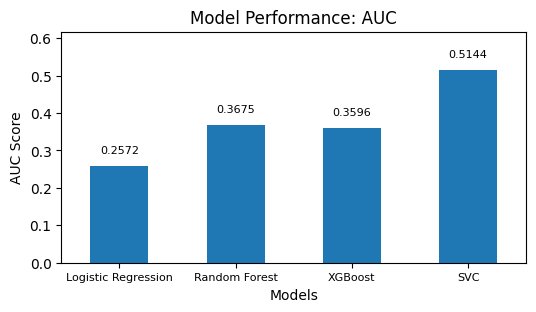

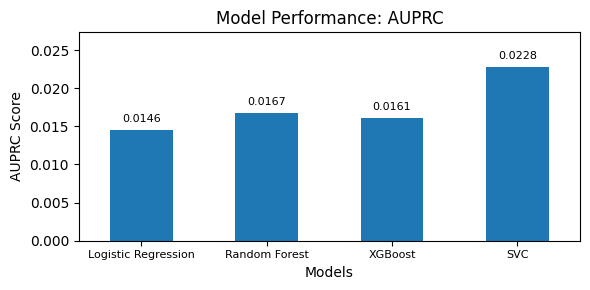

In [2054]:
make_chart_from_dic(plco_dic)

## Geographic Features

The list of geographic features is named "training_features_list"

In [2106]:
geo_dic = {}
X = perform_data_preprocessing(training_features_list)
y = final_no_dupes_sorted_df['First Year Diagnosis']

/tmp/ipykernel_3870527/2744096248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[numerical_cols] = training_df[numerical_cols].fillna(training_df[numerical_cols].mean())
/tmp/ipykernel_3870527/2744096248.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[categorical_cols] = training_df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


### Logistic Regression

In [2107]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [2108]:
best_log_reg_model_geo, roc_score_lr_geo, auprc_lr_geo = train_model(X, y, pipe_lr, params_lr)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2109]:
print_model_scores(best_log_reg_model_geo, roc_score_lr_geo, auprc_lr_geo)

The best AUC score: 0.9462434478741992
was achieved with the parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
On the test set, the model achieved an AUC of: 0.8937007874015748
On the test set, the model achieved an AUPRC of: 0.4243881118881119


In [2110]:
geo_dic["Logistic Regression"] = [roc_score_lr_geo, auprc_lr_geo]

### Random Forest

In [2111]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [2112]:
best_rand_for_model_geo, roc_score_rf_geo, auprc_rf_geo = train_model(X, y, pipe_rf, params_rf)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2113]:
print_model_scores(best_rand_for_model_geo, roc_score_rf_geo, auprc_rf_geo)

The best AUC score: 0.8978062512133566
was achieved with the parameters: {'randfor__max_features': 10, 'randfor__n_estimators': 500}
On the test set, the model achieved an AUC of: 0.6863517060367454
On the test set, the model achieved an AUPRC of: 0.13813186813186812


In [2114]:
geo_dic["Random Forest"] = [roc_score_rf_geo, auprc_rf_geo]

### XGBoost

In [2115]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [2116]:
best_xgboost_model_geo, roc_score_xgb_geo, auprc_xgb_geo = train_model(X, y, pipe_xgb, params_xgb)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2117]:
print_model_scores(best_xgboost_model_geo, roc_score_xgb_geo, auprc_xgb_geo)

The best AUC score: 0.9591147350029121
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 10}
On the test set, the model achieved an AUC of: 0.8320209973753281
On the test set, the model achieved an AUPRC of: 0.0873784473138849


In [2118]:
geo_dic["XGBoost"] = [roc_score_xgb_geo, auprc_xgb_geo]

### SVC

In [2119]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [2120]:
best_svc_model_geo, roc_score_svc_geo, auprc_svc_geo = train_model(X, y, pipe_svc, params_svc)

The predicted labels are: 
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2121]:
print_model_scores(best_svc_model_geo, roc_score_svc_geo, auprc_svc_geo)

The best AUC score: 0.9531547272374297
was achieved with the parameters: {'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__coef0': 1, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.9186351706036746
On the test set, the model achieved an AUPRC of: 0.14962759462759462


In [2122]:
geo_dic["SVC"] = [roc_score_svc_geo, auprc_svc_geo]

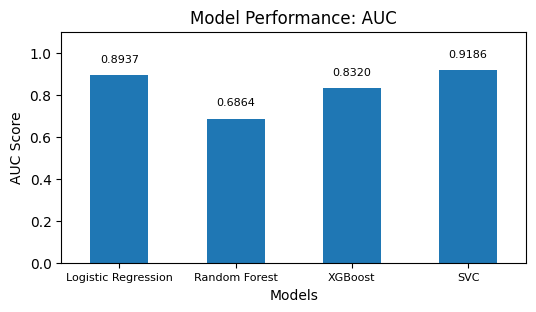

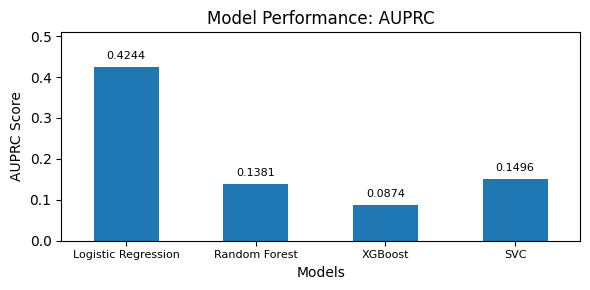

In [2123]:
make_chart_from_dic(geo_dic)

# Incorporating Image Features

In [2130]:
# Flatten the nested lists
flattened_data = no_duplicates_df['Feature Vector'].apply(lambda x: x[0])

# Convert the flattened data into a DataFrame with separate columns
flat_feature_vector_df = pd.DataFrame(flattened_data.tolist(), index=no_duplicates_df.index)

In [2131]:
flat_feature_vector_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.442415,0.979458,1.382697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.051218,0.0,0.0,0.0,0.0,0.189137,1.459538,0.0,0.0,0.0,0.0,0.0,0.412745,0.001249,0.0,0.0,2.096575,0.769951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.352385,0.0,0.0,0.0,0.0,0.0,0.0,0.024827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057056,0.0,0.0,0.196253,0.0,0.0,0.0,0.0,0.0,0.722017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.956508,0.156563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410805,0.126946,0.0,0.0,0.670663,0.0,0.0,0.0,0.547078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.592713,0.0,0.0,1.992249,0.0,0.163242,0.084249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.824294,0.0,0.0,0.003827,0.0,0.0,1.813190,0.0,1.522237,0.0,0.0,0.0,0.0,0.044113,0.657951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.315002,0.0,0.462915,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.859291,0.0,0.0,0.0,0.273500,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.594694,0.00000,0.0,0.0,0.0,0.0,0.884500,0.841249,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.531059,0.0,0.0,0.0,3.091310,1.943601,1.481433,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056373,0.0,0.008687,0.0,2.911451,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178903,0.0,0.755051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014329,0.0,1.583588,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021077,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.879954,0.0,0.024792,1.531866,0.0,1.693264,1.028351,0.0,0.0,0.0,2.502298,0.0,0.0,0.0,2.085796,0.201506,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.125832,0.0,0.0,1.054716,2.068297,0.646200,0.0,0.0,0.0,0.0,1.415864,0.0,0.875038,0.0,0.0,0.000309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.852592,0.0,0.0,1.811659,0.0,0.0,0.0,0.0,0.0,0.888630,2.446887,0.631063,0.0,0.0,0.000000,0.458661,2.123301,0.0,0.0,0.0,1.247021,0.0,0.0,0.0,0.0,0.0,2.207825,0.0,0.621598,0.0,0.0,0.041443,0.155480,2.393792,0.0,0.663106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.872007,0.847052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.129184,0.0,0.0,0.0,0.0,0.0,0.004168,0.168297,0.0,0.0,0.0

In [2132]:
# Check if all values in each column are zero
zero_columns = (flat_feature_vector_df == 0).all()

# Filter columns that are all zeros
all_zero_columns = zero_columns[zero_columns].index.tolist()

# Display the result
print(f'Columns with all zeros: {all_zero_columns}')
print("The number of columns with all 0s", len(all_zero_columns))

Columns with all zeros: [0, 1, 3, 4, 5, 6, 7, 8, 12, 13, 15, 16, 18, 20, 21, 23, 24, 25, 26, 29, 31, 32, 33, 36, 37, 42, 44, 45, 46, 50, 51, 52, 53, 56, 57, 58, 60, 61, 63, 64, 66, 67, 68, 70, 72, 73, 74, 75, 78, 79, 80, 83, 84, 85, 87, 88, 89, 90, 93, 94, 96, 97, 100, 101, 103, 104, 105, 106, 108, 109, 115, 116, 117, 118, 119, 120, 121, 123, 124, 126, 127, 129, 131, 132, 133, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 159, 161, 162, 163, 165, 166, 169, 170, 174, 175, 176, 178, 179, 180, 181, 184, 187, 188, 189, 190, 195, 196, 197, 199, 200, 201, 202, 203, 204, 207, 208, 209, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 229, 231, 233, 235, 238, 239, 240, 242, 243, 244, 247, 249, 250, 251, 252, 253, 254, 255, 261, 263, 264, 265, 266, 267, 268, 270, 272, 273, 274, 275, 276, 277, 279, 282, 287, 289, 290, 291, 294, 295, 298, 300, 302, 303, 304, 305, 309, 313, 314, 315, 316, 318, 320, 321, 323, 325, 328, 329, 330, 

In [1836]:
len(all_zero_columns)

310

In [2133]:
# Remove columns that contain only zeros
flat_feature_vector_non_zero = flat_feature_vector_df.loc[:, (flat_feature_vector_df != 0).any(axis=0)]
flat_feature_vector_non_zero

,2,9,10,11,14,17,19,22,27,28,30,34,35,38,39,40,41,43,47,48,49,54,55,59,62,65,69,71,76,77,81,82,86,91,92,95,98,99,102,107,110,111,112,113,114,122,125,128,130,134,135,136,149,158,160,164,167,168,171,172,173,177,182,183,185,186,191,192,193,194,198,205,206,210,211,212,213,225,228,230,232,234,236,237,241,245,246,248,256,257,258,259,260,262,269,271,278,280,281,283,284,285,286,288,292,293,296,297,299,301,306,307,308,310,311,312,317,319,322,324,326,327,331,334,337,340,341,342,345,346,347,350,351,352,355,357,359,362,363,364,366,371,374,375,379,385,388,391,392,395,398,399,400,401,402,403,404,406,409,411,412,413,414,415,416,417,425,426,427,432,435,440,441,443,445,446,448,452,454,456,457,461,463,465,467,468,470,472,475,479,480,492,494,496,498,501,502,503,505,507,508,511
530,0.0,1.442415,0.979458,1.382697,0.000000,0.0,0.000000,0.051218,0.189137,1.459538,0.0,0.412745,0.001249,2.096575,0.769951,0.000000,0.000000,0.0,0.352385,0.000000,0.0,0.024827,0.0,0.0,0.057056,0.196253,0.0,0.722017,0.0,0.000000,0.956508,0.156563,0.000000,0.410805,0.126946,0.670663,0.000000,0.547078,0.000000,2.592713,1.992249,0.0,0.163242,0.084249,0.0,1.824294,0.003827,1.813190,1.522237,0.0,0.044113,0.657951,0.000000,1.315002,0.462915,0.000000,0.000000,0.000000,0.0,0.0,1.859291,0.273500,0.000000,0.0,0.594694,0.000000,0.884500,0.841249,0.0,0.0,0.000000,0.0,1.531059,3.091310,1.943601,1.481433,0.000000,0.0,0.056373,0.008687,2.911451,0.0,0.000000,0.0,0.000000,0.0,0.178903,0.755051,0.014329,0.0,1.583588,0.0,0.000000,0.0,0.021077,0.000000,1.879954,0.024792,1.531866,1.693264,1.028351,0.000000,0.0,2.502298,2.085796,0.201506,0.0,0.000000,0.0,0.000000,0.0,1.125832,0.0,1.054716,2.068297,0.646200,1.415864,0.875038,0.000309,0.0,0.0,0.000000,0.852592,1.811659,0.000000,0.888630,2.446887,0.631063,0.000000,0.458661,2.123301,0.0,1.247021,0.0,0.000000,2.207825,0.621598,0.041443,0.155480,2.393792,0.663106,0.000000,0.872007,0.847052,0.0,1.129184,0.0,0.004168,0.168297,0.0,2.867068,0.0,3.881856,0.045345,1.469545,1.735152,1.940856,0.0,0.581757,0.000000,0.000000,0.0,0.221684,0.720002,0.0,0.000000,1.096491,0.0,1.499828,0.0,0.0,0.0,0.000000,0.0,1.157751,1.074228,0.0,2.331456,0.000000,0.000000,0.074390,1.865828,0.140466,0.039528,1.069407,0.0,1.122580,0.000000,0.0,0.0,0.0,1.777683,1.335706,1.126231,2.476044,0.015726,0.010653,0.0,3.830955,0.000000,2.259368,0.0
0,0.0,0.215248,0.000000,3.066103,0.000000,0.0,0.763549,0.000000,0.000000,1.146970,0.0,1.408737,0.005360,3.049240,0.000000,0.000000,0.000000,0.0,0.729645,0.000000,0.0,0.027672,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.209961,0.006668,0.000000,0.000000,1.204632,0.000000,3.895772,2.226828,0.0,1.346876,0.158079,0.0,2.334408,0.019718,3.248391,2.724912,0.0,0.000000,1.075105,0.000000,1.183936,0.955192,0.000000,0.252607,0.000000,0.0,0.0,2.800408,1.135344,0.043791,0.0,0.393887,0.564710,1.693386,1.512464,0.0,0.0,0.000000,0.0,2.331117,4.154518,3.146851,1.486826,0.117416,0.0,0.069843,0.019992,3.714994,0.0,0.000502,0.0,0.000000,0.0,0.933495,0.837063,0.029105,0.0,2.271593,0.0,0.266094,0.0,0.031454,0.085164,2.521014,0.048483,3.646548,3.158188,2.232949,0.000000,0.0,3.153560,3.427495,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.989396,0.0,2.429798,4.518967,0.936972,1.526005,2.481845,0.000000,0.0,0.0,0.000000,0.000000,2.657097,0.000000,1.144055,4.744037,1.296860,0.085728,1.364533,4.887303,0.0,1.477430,0.0,0.000000,3.878922,1.083254,0.032651,1.402976,3.974570,0.320856,0.000000,0.000000,0.942980,0.0,1.514465,0.0,0.011667,0.090300,0.0,3.074779,0.0,4.548908,0.050225,3.533880,3.015408,2.443965,0.0,1.402568,0.000000,0.000000,0.0,0.000000,1.047672,0.0,0.000000,1.931989,0.0,1.661246,0.0,0.0,0.0,0.000000,0.0,2.462698,3.241183,0.0,2.081274,0.000000,0.295225,0.000000,3.951287,0.181124,0.048485,0.000000,0.0,1.475713,0.000000,0.0,0.0,0.0,2.641380,2.773979,1.485482,2.899837,0.023419,0.441963,0.0,3.849188,0.000000,2.716783,0.0
1,0.0,1.452852,1.147668,1.906427,0.000000,0.0,0.000000,0.000000,0.656509,0.974356,0.0,0.000000,0.001475,2.134723,0.9773

In [2138]:
# remove index

flat_feature_vector_non_zero = flat_feature_vector_non_zero.reset_index(drop=True)

# Imaging Features

The image feature vector is named "flat_feature_vector_non_zero"

In [2203]:
im_dic = {}

X = flat_feature_vector_non_zero  
y = final_no_dupes_sorted_df['First Year Diagnosis']

### Logistic Regression

In [2204]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [2205]:
best_log_reg_model_im, roc_score_lr_im, auprc_lr_im = train_model(X, y, pipe_lr, params_lr)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2206]:
print_model_scores(best_log_reg_model_im, roc_score_lr_im, auprc_lr_im)

The best AUC score: 0.8874296253154726
was achieved with the parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
On the test set, the model achieved an AUC of: 0.9921259842519685
On the test set, the model achieved an AUPRC of: 0.8166666666666667


In [2143]:
im_dic["Logistic Regression"] = [roc_score_lr_im, auprc_lr_im]

### Random Forest

In [2144]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [2145]:
best_rand_for_model_im, roc_score_rf_im, auprc_rf_im = train_model(X, y, pipe_rf, params_rf)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2146]:
print_model_scores(best_rand_for_model_im, roc_score_rf_im, auprc_rf_im)

The best AUC score: 0.8753057658707046
was achieved with the parameters: {'randfor__max_features': 4, 'randfor__n_estimators': 100}
On the test set, the model achieved an AUC of: 0.994750656167979
On the test set, the model achieved an AUPRC of: 0.8500000000000001


In [2147]:
im_dic["Random Forest"] = [roc_score_rf_im, auprc_rf_im]

### XGBoost

In [2148]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [2149]:
best_xgboost_model_im, roc_score_xgb_im, auprc_xgb_im = train_model(X, y, pipe_xgb, params_xgb)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2150]:
print_model_scores(best_xgboost_model_im, roc_score_xgb_im, auprc_xgb_im)

The best AUC score: 0.8903513880799846
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 30}
On the test set, the model achieved an AUC of: 1.0
On the test set, the model achieved an AUPRC of: 1.0


In [2151]:
im_dic["XGBoost"] = [roc_score_xgb_im, auprc_xgb_im]

### SVC

In [2152]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [2153]:
best_svc_model_im, roc_score_svc_im, auprc_svc_im = train_model(X, y, pipe_svc, params_svc)

The predicted labels are: 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2154]:
print_model_scores(best_svc_model_im, roc_score_svc_im, auprc_svc_im)

The best AUC score: 0.9117355853232383
was achieved with the parameters: {'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__coef0': 0.5, 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
On the test set, the model achieved an AUC of: 0.9921259842519685
On the test set, the model achieved an AUPRC of: 0.8166666666666667


In [2155]:
im_dic["SVC"] = [roc_score_svc_im, auprc_svc_im]

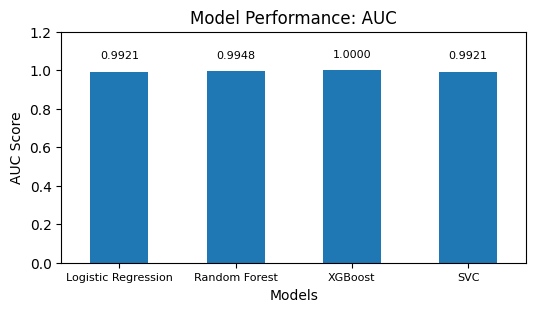

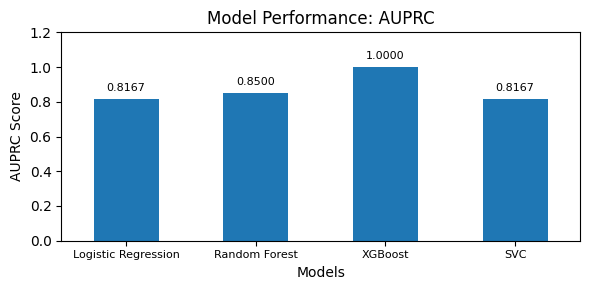

In [2156]:
make_chart_from_dic(im_dic)

## PLCO + Imaging Features

The list of PLCO features is named "plco_features_list" 

The image feature vector is named "flat_feature_vector_non_zero"

In [2207]:
plco_im_dic = {}

X = perform_data_preprocessing(plco_features_list)
X = pd.concat([X, flat_feature_vector_non_zero], axis=1)
X.columns = [str(col) for col in X.columns]
    
y = final_no_dupes_sorted_df['First Year Diagnosis']

/tmp/ipykernel_3870527/2744096248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[numerical_cols] = training_df[numerical_cols].fillna(training_df[numerical_cols].mean())
/tmp/ipykernel_3870527/2744096248.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[categorical_cols] = training_df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


### Logistic Regression

In [2208]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [2209]:
best_log_reg_plco_im, roc_score_lr_plco_im, auprc_lr_plco_im = train_model(X, y, pipe_lr, params_lr)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2210]:
print_model_scores(best_log_reg_plco_im, roc_score_lr_plco_im, auprc_lr_plco_im)

The best AUC score: 0.8837507280139778
was achieved with the parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
On the test set, the model achieved an AUC of: 0.9868766404199475
On the test set, the model achieved an AUPRC of: 0.7767857142857143


In [2172]:
plco_im_dic["Logistic Regression"] = [roc_score_lr_plco_im, auprc_lr_plco_im]

### Random Forest

In [2173]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [2174]:
best_rand_for_plco_im, roc_score_rf_plco_im, auprc_rf_plco_im = train_model(X, y, pipe_rf, params_rf)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2175]:
print_model_scores(best_rand_for_plco_im, roc_score_rf_plco_im, auprc_rf_plco_im)

The best AUC score: 0.8693845855173754
was achieved with the parameters: {'randfor__max_features': 10, 'randfor__n_estimators': 100}
On the test set, the model achieved an AUC of: 0.753280839895013
On the test set, the model achieved an AUPRC of: 0.6203336090432864


In [2176]:
plco_im_dic["Random Forest"] = [roc_score_rf_im, auprc_rf_im]

### XGBoost

In [2177]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [2178]:
best_xgboost_plco_im, roc_score_xgb_plco_im, auprc_xgb_plco_im = train_model(X, y, pipe_xgb, params_xgb)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2179]:
print_model_scores(best_xgboost_plco_im, roc_score_xgb_plco_im, auprc_xgb_plco_im)

The best AUC score: 0.8512036497767423
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 10}
On the test set, the model achieved an AUC of: 0.984251968503937
On the test set, the model achieved an AUPRC of: 0.6378968253968254


In [2180]:
plco_im_dic["XGBoost"] = [roc_score_xgb_im, auprc_xgb_im]

### SVC

In [2181]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [2182]:
best_svc_plco_im, roc_score_svc_plco_im, auprc_svc_plco_im = train_model(X, y, pipe_svc, params_svc)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2183]:
print_model_scores(best_svc_plco_im, roc_score_svc_plco_im, auprc_svc_plco_im)

The best AUC score: 0.9183168316831682
was achieved with the parameters: {'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__coef0': 1, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.9868766404199475
On the test set, the model achieved an AUPRC of: 0.7767857142857143


In [2186]:
plco_im_dic["SVC"] = [roc_score_svc_plco_im, auprc_svc_plco_im]

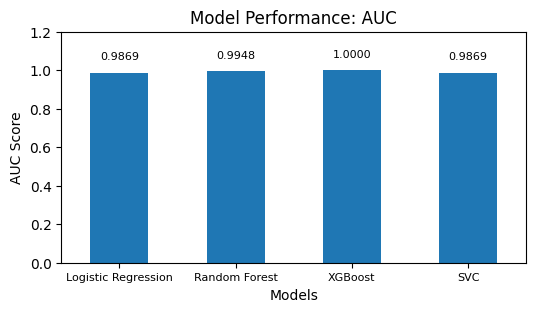

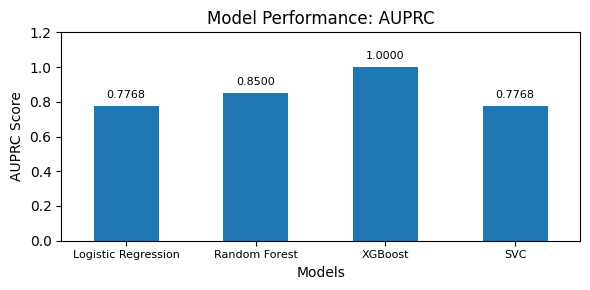

In [2187]:
make_chart_from_dic(plco_im_dic)

## Geographic + Imaging Features

The list of Geographic features is named "training_features_list"

The image feature vector is named "flat_feature_vector_non_zero"

In [2211]:
geo_im_dic = {}

X = perform_data_preprocessing(training_features_list)
X = pd.concat([X, flat_feature_vector_non_zero], axis=1)
X.columns = [str(col) for col in X.columns]
    
y = final_no_dupes_sorted_df['First Year Diagnosis']

/tmp/ipykernel_3870527/2744096248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[numerical_cols] = training_df[numerical_cols].fillna(training_df[numerical_cols].mean())
/tmp/ipykernel_3870527/2744096248.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[categorical_cols] = training_df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


### Logistic Regression

In [2212]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

#specify parameter values to search
params_lr = {}
params_lr['logreg__C'] = [0.1, 1, 10]
params_lr['logreg__penalty'] = ['l1', 'l2']

In [2213]:
best_log_reg_model_geo_im, roc_score_lr_geo_im, auprc_lr_geo_im = train_model(X, y, pipe_lr, params_lr)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2214]:
print_model_scores(best_log_reg_model_geo_im, roc_score_lr_geo_im, auprc_lr_geo_im)

The best AUC score: 0.9694331197825665
was achieved with the parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
On the test set, the model achieved an AUC of: 0.973753280839895
On the test set, the model achieved an AUPRC of: 0.732905982905983


In [2215]:
geo_im_dic["Logistic Regression"] = [roc_score_lr_geo_im, auprc_lr_geo_im]

### Random Forest

In [2216]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [2217]:
best_rand_for_model_geo_im, roc_score_rf_geo_im, auprc_rf_geo_im = train_model(X, y, pipe_rf, params_rf)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2218]:
print_model_scores(best_rand_for_model_geo_im, roc_score_rf_geo_im, auprc_rf_geo_im)

The best AUC score: 0.8901378373131431
was achieved with the parameters: {'randfor__max_features': 2, 'randfor__n_estimators': 500}
On the test set, the model achieved an AUC of: 0.6916010498687664
On the test set, the model achieved an AUPRC of: 0.6735724879495736


In [2219]:
geo_im_dic["Random Forest"] = [roc_score_rf_geo_im, auprc_rf_geo_im]

### XGBoost

In [2224]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [2221]:
best_xgboost_model_geo_im, roc_score_xgb_geo_im, auprc_xgb_geo_im = train_model(X, y, pipe_xgb, params_xgb)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2222]:
print_model_scores(best_xgboost_model_geo_im, roc_score_xgb_geo_im, auprc_xgb_geo_im)

The best AUC score: 0.9060376625897885
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 50}
On the test set, the model achieved an AUC of: 0.9343832020997376
On the test set, the model achieved an AUPRC of: 0.6968694885361552


In [2223]:
geo_im_dic["XGBoost"] = [roc_score_xgb_geo_im, auprc_xgb_geo_im]

### SVC

In [2225]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 0.95)), 
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [2226]:
best_svc_model_geo_im, roc_score_svc_geo_im, auprc_svc_geo_im = train_model(X, y, pipe_svc, params_svc)

The predicted labels are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0]
The actual labels are: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2227]:
print_model_scores(best_svc_model_geo_im, roc_score_svc_geo_im, auprc_svc_geo_im)

The best AUC score: 0.9707532517957678
was achieved with the parameters: {'svc__C': 1, 'svc__class_weight': 'balanced', 'svc__coef0': 0.0, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.984251968503937
On the test set, the model achieved an AUPRC of: 0.7638888888888888


In [2228]:
geo_im_dic["SVC"] = [roc_score_svc_geo_im, auprc_svc_geo_im]

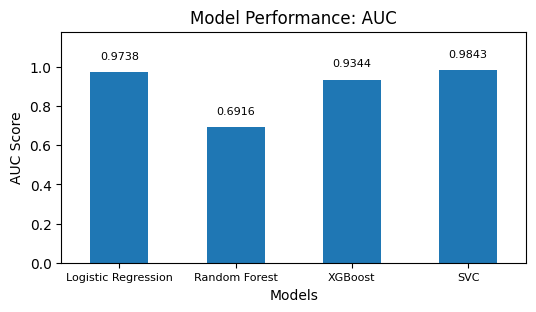

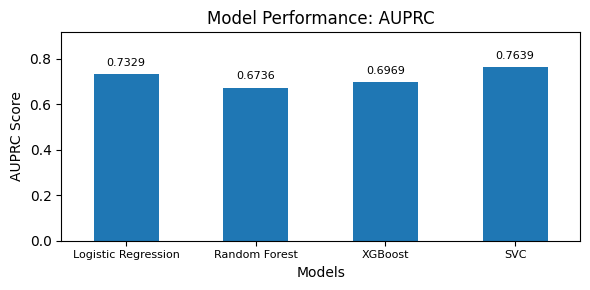

In [2229]:
make_chart_from_dic(geo_im_dic)

# Using L1 Regularization for Feature Selection

In [1709]:
X = perform_data_preprocessing(training_features_list)
X = pd.concat([X, flat_feature_vector_non_zero], axis=1)
X.columns = [str(col) for col in X.columns]
    
y = final_no_dupes_sorted_df['First Year Diagnosis']

/tmp/ipykernel_3870527/3983553547.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[numerical_cols] = training_df[numerical_cols].fillna(training_df[numerical_cols].mean())
/tmp/ipykernel_3870527/3983553547.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[categorical_cols] = training_df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [1710]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Logistic Regression with regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1711]:
# Fit the Logistic Regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # Adjust C for stronger or weaker regularization
logreg.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [1721]:
# Get the coefficients
coefficients = logreg.coef_[0]

# Identify the features with non-zero coefficients
selected_features = np.where(coefficients != 0)[0]

print("Selected features indexes:", selected_features)

Selected features indexes: [  2   9  22  24  33  34  45  46  50  64  72  76  77  82  83  84  85  86
  91  92  96  98  99 103 104 105 106 110 115 116 119 120 125 126 131 132
 133 138 139 160 170 187 190 203 207 215 216 217 226 244 261 265 267 274
 277 292 298 319 330 332 335]


In [1722]:
# Create a DataFrame to hold the data and feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# Get the column names of the selected features

selected_features_names = [X.columns.tolist()[i] for i in selected_features]
selected_features_names

['intensity_final_corrected_x',
 'interval_2016_to_last_img_exam_x',
 'pct_no_computer',
 'pct_hh_children',
 'pct_asian_lang',
 'pct_vacant',
 'wildfire_pct',
 'lim_transit_access',
 'bphigh_crudeprev',
 'checkup_crudeprev',
 'binge_crudeprev',
 'loc_t0',
 'adi_new',
 'lungrads_x_4A',
 'lungrads_x_4B',
 'lungrads_x_4X',
 'sex_x_Female',
 'sex_x_Male',
 'copd_No',
 'copd_Yes',
 'race_ethnicity_new_x_Hispanic',
 'race_ethnicity_new_x_White',
 'insurance_new_x_Medicare/Medicaid',
 'education_new_x_High school graduate or GED',
 'education_new_x_Less than high school graduate',
 'education_new_x_Postgraduate',
 'education_new_x_Some college or technical school',
 'lungrads_category_x_3-4',
 'eligibility_final_corrected_x_Ineligible: pack-years<30 - before',
 'eligibility_final_corrected_x_Ineligible: years since quit>15',
 'smoking_status_final_corrected_x_Current',
 'smoking_status_final_corrected_x_Former',
 'last_exam_type_x_Lung Non-Screening LDCT',
 'last_exam_type_x_Lung Screening L

## Geographic + Imaging Features + Lasso Regression

The list of L1 reduced features is named "training_features_list"

The image feature vector is named "flat_feature_vector_non_zero"

In [1725]:
geo_lasso_dic = {}

X= X[selected_features_names]
    
y = final_merged_sorted_df['First Year Diagnosis']

### Logistic Regression

In [1729]:
# Create a pipeline that first scales the data then trains the model
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

#specify parameter values to search
params_lr_lasso = {}
params_lr_lasso['logreg__C'] = [0.1, 1, 10]
params_lr_lasso['logreg__penalty'] = ['l1', 'l2']

In [1730]:
best_log_reg_model_lasso, roc_score_lr_lasso, auprc_lr_lasso = train_model(X, y, pipe_lr, params_lr)

In [1731]:
print_model_scores(best_log_reg_model_lasso, roc_score_lr_lasso, auprc_lr_lasso)

The best AUC score: 0.933721607454863
was achieved with the parameters: {'logreg__C': 1, 'logreg__penalty': 'l1'}
On the test set, the model achieved an AUC of: 0.9632545931758529
On the test set, the model achieved an AUPRC of: 0.7169117647058822


In [1735]:
geo_lasso_dic["Logistic Regression"] = [roc_score_lr_lasso, auprc_lr_lasso]

### Random Forest

In [1732]:
# Create a pipeline that first scales the data then trains the model
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('randfor', RandomForestClassifier())
])

#specify parameter values to search
params_rf = {}
params_rf['randfor__n_estimators'] = [10, 100, 500]
params_rf['randfor__max_features'] = [2, 4, 6, 8, 10]

In [1733]:
best_rand_for_model_lasso, roc_score_rf_lasso, auprc_rf_lasso = train_model(X, y, pipe_rf, params_rf)

In [1734]:
print_model_scores(best_rand_for_model_lasso, roc_score_rf_lasso, auprc_rf_lasso)

The best AUC score: 0.8144971850126188
was achieved with the parameters: {'randfor__max_features': 10, 'randfor__n_estimators': 100}
On the test set, the model achieved an AUC of: 0.8464566929133858
On the test set, the model achieved an AUPRC of: 0.6803678678678678


In [1736]:
geo_lasso_dic["Random Forest"] = [roc_score_rf_lasso, auprc_rf_lasso]

### XGBoost

In [1699]:
# Create a pipeline that first scales the data then trains the model
pipe_xgb = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('xgb', XGBClassifier())
])

#specify parameter values to search
params_xgb = {}
params_xgb['xgb__max_depth'] = [10, 25, 50]
params_xgb['xgb__n_estimators'] = [10, 30, 50, 70]

In [1737]:
best_xgboost_model_lasso, roc_score_xgb_lasso, auprc_xgb_lasso = train_model(X, y, pipe_xgb, params_xgb)

In [1738]:
print_model_scores(best_xgboost_model_lasso, roc_score_xgb_lasso, auprc_xgb_lasso)

The best AUC score: 0.9272471364783537
was achieved with the parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 30}
On the test set, the model achieved an AUC of: 0.9317585301837271
On the test set, the model achieved an AUPRC of: 0.42980399230399224


In [1739]:
geo_lasso_dic["XGBoost"] = [roc_score_xgb_lasso, auprc_xgb_lasso]

### SVC

In [1740]:
# Create a pipeline that first scales the data then trains the model
pipe_svc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(probability = True))
])

#specify parameter values to search
params_svc = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svc__coef0': [0.0, 0.1, 0.5, 1],
    'svc__class_weight': [None, 'balanced']
}

In [1741]:
best_svc_model_lasso, roc_score_svc_lasso, auprc_svc_lasso = train_model(X, y, pipe_svc, params_svc)

In [1742]:
print_model_scores(best_svc_model_lasso, roc_score_svc_lasso, auprc_svc_lasso)

The best AUC score: 0.9549504950495049
was achieved with the parameters: {'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__coef0': 0.5, 'svc__degree': 2, 'svc__gamma': 0.1, 'svc__kernel': 'sigmoid'}
On the test set, the model achieved an AUC of: 0.6692913385826771
On the test set, the model achieved an AUPRC of: 0.15566270540190064


In [1743]:
geo_lasso_dic["SVC"] = [roc_score_svc_lasso, auprc_svc_lasso]

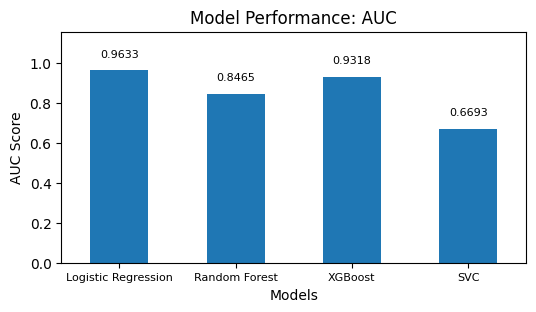

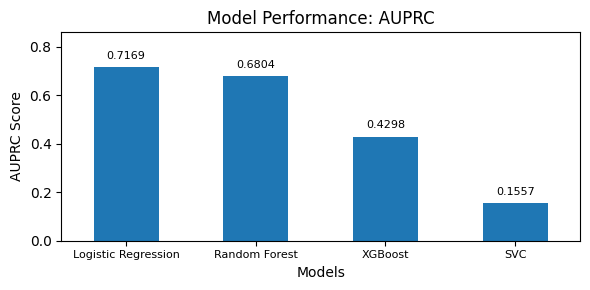

In [1744]:
make_chart_from_dic(geo_lasso_dic)